<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICAL 3: Exploratory Data Analysis (EDA)
Problem Statement: AI Model for Predicting Student Dropout Risk



In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

1. BASIC INFORMATION

In [ ]:
# Load dataset
file_path = "/content/Student_Dropout_Dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Basic structure
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types and non-null counts:")
print(df.info())

Shape of dataset: (4424, 37)

Column names:
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', '

In [ ]:
# Display first and last few rows
display(df.head())
display(df.tail())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,5,9,152.0,1,0,0,1,0,0,22,1,0,6,8,6,11.666667,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [ ]:
# Identify numerical & categorical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("\nNumerical Features:", num_features)
print("Categorical Features:", cat_features)


Numerical Features: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


2. MISSING VALUE ANALYSIS

In [ ]:
print("\nMissing Values per Column:\n")
print(df.isnull().sum())


Missing Values per Column:

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                 

3. STATISTICAL SUMMARY

In [ ]:
print("\n📈 Statistical Summary of Numerical Features:\n")
summary = df[num_features].describe().T
summary["variance"] = df[num_features].var()
summary["skewness"] = df[num_features].skew()
summary["kurtosis"] = df[num_features].kurt()
display(summary)


📈 Statistical Summary of Numerical Features:



,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000,3.669294e-01,4.399764,21.482639
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000,3.057141e+02,0.393036,-1.453806
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000,1.726052e+00,1.881050,2.651289
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000,4.258306e+06,-3.809135,13.199149
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000,9.727954e-02,-2.507238,4.288179
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000,1.043788e+02,2.871207,6.778166
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000,1.739321e+02,0.312867,0.968258
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000,4.781050e+01,10.703998,135.146206
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000,2.434594e+02,0.001978,-1.692292
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000,2.354110e+02,-0.298697,-1.580592


4. SKEWNESS & KURTOSIS

In [ ]:
print("\n📊 Skewness & Kurtosis Analysis:\n")
for col in num_features:
    sk = df[col].skew()
    ku = df[col].kurt()
    if abs(sk) > 0.5:
        skew_type = "Right" if sk > 0 else "Left"
        print(f"{col}: {skew_type} Skewed (Sk={sk:.2f}), Kurtosis={ku:.2f}")
    else:
        print(f"{col}: Approximately Normal (Sk={sk:.2f}), Kurtosis={ku:.2f}")


📊 Skewness & Kurtosis Analysis:

Marital status: Right Skewed (Sk=4.40), Kurtosis=21.48
Application mode: Approximately Normal (Sk=0.39), Kurtosis=-1.45
Application order: Right Skewed (Sk=1.88), Kurtosis=2.65
Course: Left Skewed (Sk=-3.81), Kurtosis=13.20
Daytime/evening attendance	: Left Skewed (Sk=-2.51), Kurtosis=4.29
Previous qualification: Right Skewed (Sk=2.87), Kurtosis=6.78
Previous qualification (grade): Approximately Normal (Sk=0.31), Kurtosis=0.97
Nacionality: Right Skewed (Sk=10.70), Kurtosis=135.15
Mother's qualification: Approximately Normal (Sk=0.00), Kurtosis=-1.69
Father's qualification: Approximately Normal (Sk=-0.30), Kurtosis=-1.58
Mother's occupation: Right Skewed (Sk=5.34), Kurtosis=29.23
Father's occupation: Right Skewed (Sk=5.40), Kurtosis=29.93
Admission grade: Right Skewed (Sk=0.53), Kurtosis=0.66
Displaced: Approximately Normal (Sk=-0.19), Kurtosis=-1.96
Educational special needs: Right Skewed (Sk=9.15), Kurtosis=81.85
Debtor: Right Skewed (Sk=2.43), Kurtos

5. VISUALIZATION

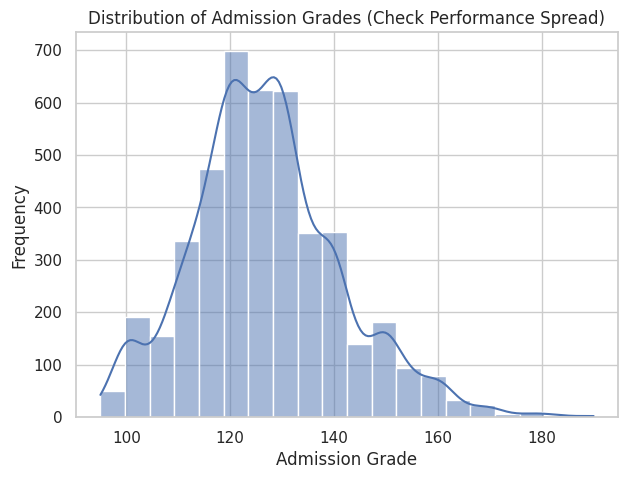

In [ ]:
# 1️⃣ Histogram – Academic Performance (Admission grade)
plt.figure(figsize=(7,5))
sns.histplot(df['Admission grade'], kde=True, bins=20)
plt.title("Distribution of Admission Grades (Check Performance Spread)")
plt.xlabel("Admission Grade")
plt.ylabel("Frequency")
plt.show()

# 👉 Insight:
# Helps us understand the range of entry academic scores.
# Lower grades might correlate with higher dropout risk.

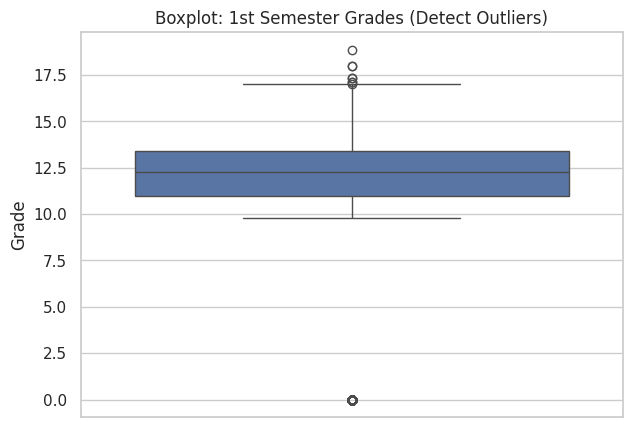

In [ ]:
# 2️⃣ Boxplot – Grades of First Semester
plt.figure(figsize=(7,5))
sns.boxplot(y=df['Curricular units 1st sem (grade)'])
plt.title("Boxplot: 1st Semester Grades (Detect Outliers)")
plt.ylabel("Grade")
plt.show()

# 👉 Insight:
# Detects students performing unusually low (potential dropouts).

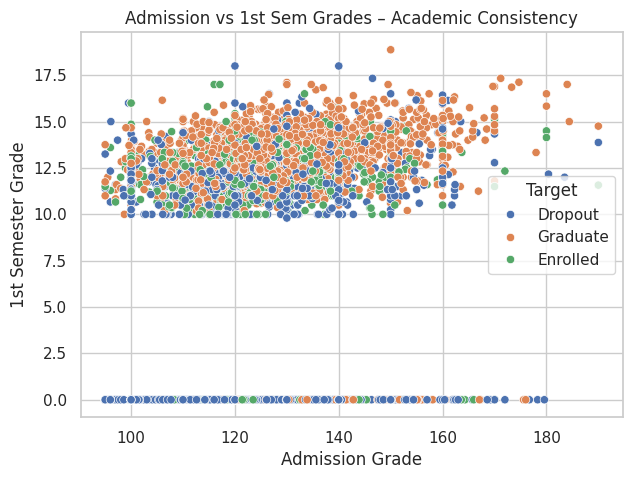

In [ ]:
# 3️⃣ Scatter Plot – Relation Between Admission Grade & 1st Sem Grade
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Admission grade'], y=df['Curricular units 1st sem (grade)'], hue=df['Target'])
plt.title("Admission vs 1st Sem Grades – Academic Consistency")
plt.xlabel("Admission Grade")
plt.ylabel("1st Semester Grade")
plt.show()

# 👉 Insight:
# Students with low admission + low semester grades likely face dropout risk.

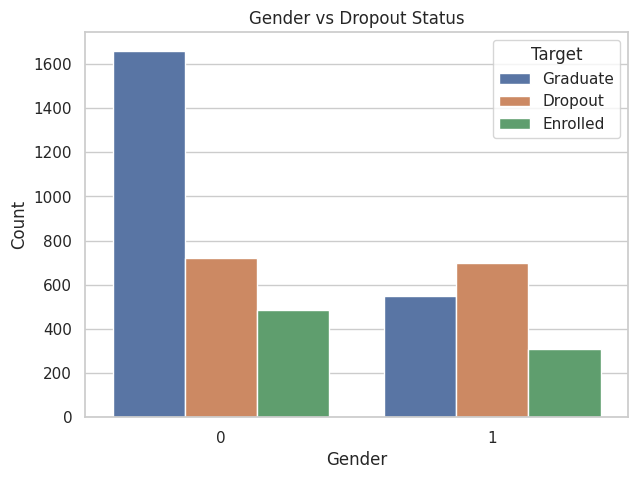

In [ ]:
# 4️⃣ Countplot – Dropout Status by Gender
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', hue='Target', data=df)
plt.title("Gender vs Dropout Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 👉 Insight:
# Checks if dropout trends differ between genders (behavioral pattern).

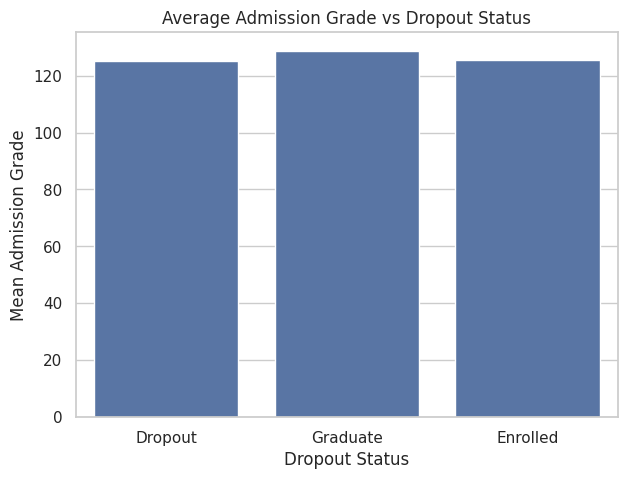

In [ ]:
# 5️⃣ Barplot – Average Admission Grade by Dropout Status
plt.figure(figsize=(7,5))
sns.barplot(x='Target', y='Admission grade', data=df, estimator='mean', ci=None)
plt.title("Average Admission Grade vs Dropout Status")
plt.xlabel("Dropout Status")
plt.ylabel("Mean Admission Grade")
plt.show()

# 👉 Insight:
# Lower average grades may clearly appear in Dropout group.

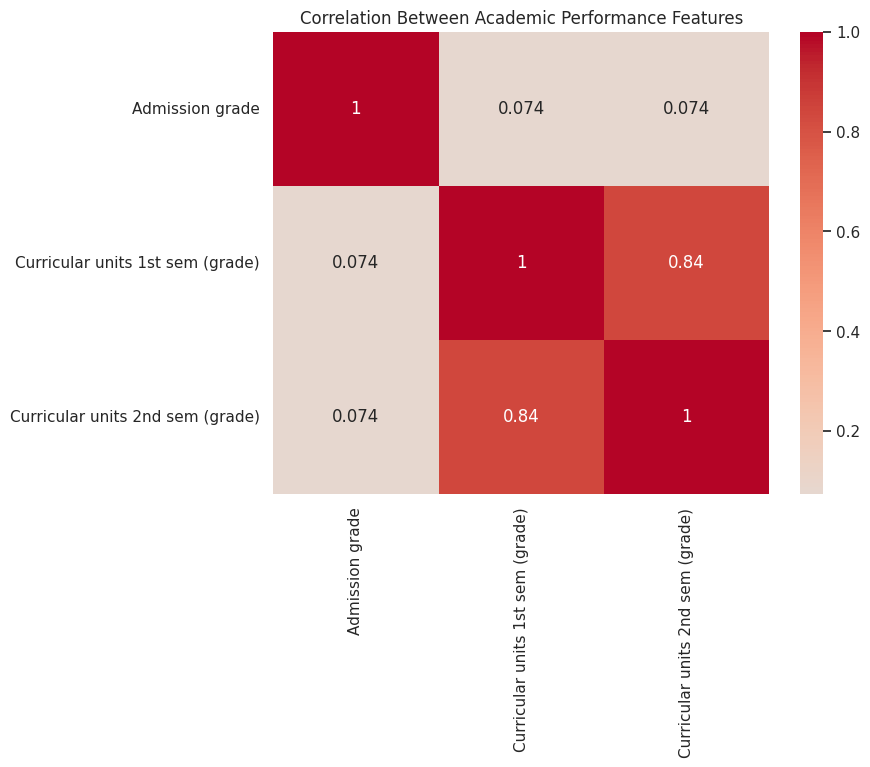

In [ ]:
# 6️⃣ Heatmap – Correlation Among Key Academic Features
plt.figure(figsize=(8,6))
academic_cols = ['Admission grade',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 2nd sem (grade)']
sns.heatmap(df[academic_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Academic Performance Features")
plt.show()

# 👉 Insight:
# High correlation indicates consistent academic patterns across semesters.

6.CORRELATION & HEATMAP

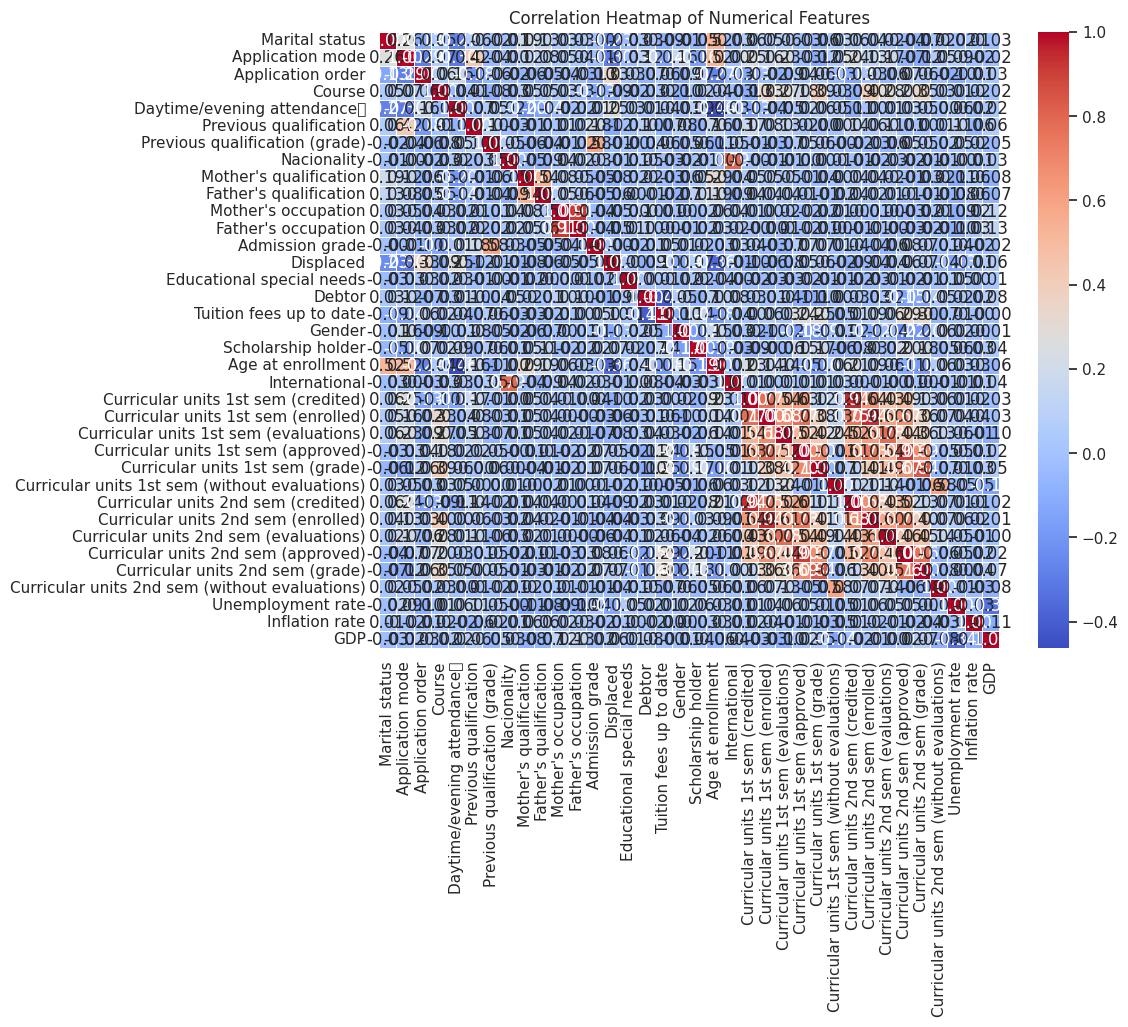


🔍 Correlation with Target (Dropout_Status):


,0
Curricular units 2nd sem (approved),0.624157
Curricular units 2nd sem (grade),0.566827
Curricular units 1st sem (approved),0.529123
Curricular units 1st sem (grade),0.485207
Tuition fees up to date,0.409827
Scholarship holder,0.297595
Curricular units 2nd sem (enrolled),0.175847
Curricular units 1st sem (enrolled),0.155974
Admission grade,0.120889
Displaced,0.113986


In [ ]:
# Select only numeric features for correlation
num_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10,8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Correlation with Target (encoded numerically)
target = 'Target'
if target in df.columns:
    encoded_target = df[target].astype('category').cat.codes
    correlations = df[num_features].corrwith(encoded_target)
    print("\n🔍 Correlation with Target (Dropout_Status):")
    display(correlations.sort_values(ascending=False))

# 👉 Insight:
# - Features with higher positive correlation indicate higher dropout likelihood.
# - Negative correlation indicates students less likely to drop out.


7. OUTLIER DETECTION & TREATMENT

In [ ]:
# Key numeric features related to academic performance
important_num = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Age at enrollment'
]

def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [ ]:
# Detect and treat outliers
for col in important_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers found.")
    cap_outliers(col)

print("\n✅ Outlier capping completed for key numeric columns.")

Admission grade: 86 outliers found.
Curricular units 1st sem (grade): 726 outliers found.
Curricular units 2nd sem (grade): 877 outliers found.
Age at enrollment: 441 outliers found.

✅ Outlier capping completed for key numeric columns.


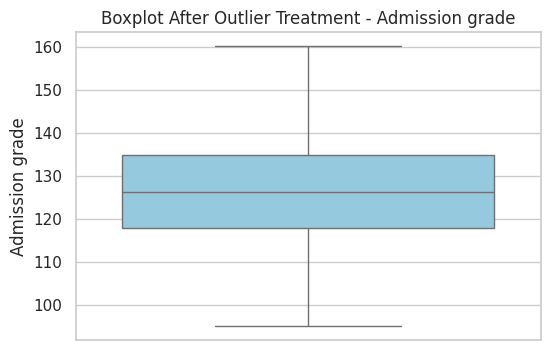

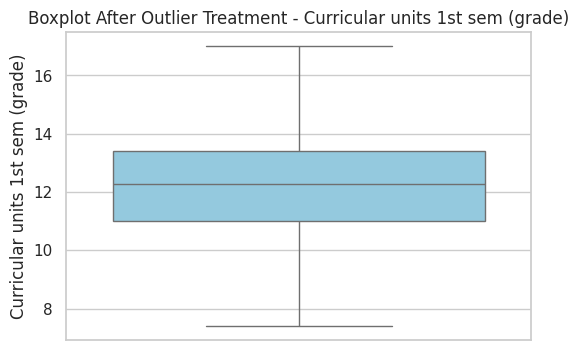

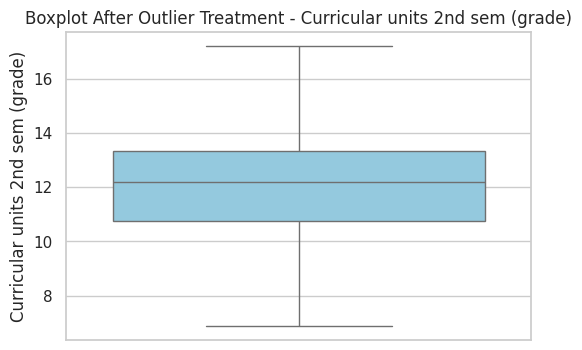

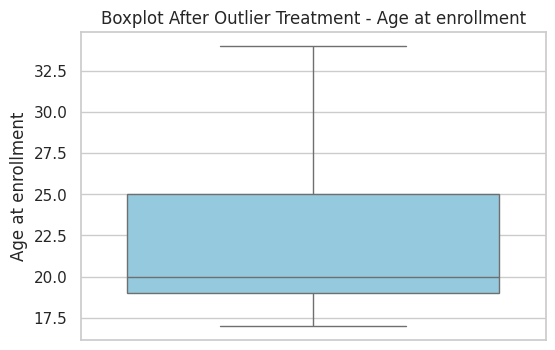

In [ ]:
# Optional: visualize after treatment
for col in important_num:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot After Outlier Treatment - {col}")
    plt.show()

# 👉 Insight:
# This helps stabilize the data distribution and reduce the effect of extreme values.

8. FINAL DATA OVERVIEW

In [ ]:
print("\nFinal Dataset Shape:", df.shape)
print("\nSample Records After EDA:")
display(df.head())

print("\n✅ EDA Completed Successfully! Dataset Ready for Data Preparation (Practical 4). 🚀")


Final Dataset Shape: (4424, 37)

Sample Records After EDA:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20.0,0,0,0,0,0,7.400000,0,0,0,0,0,6.875000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19.0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19.0,0,0,6,0,0,7.400000,0,0,6,0,0,6.875000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20.0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,34.0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate



✅ EDA Completed Successfully! Dataset Ready for Data Preparation (Practical 4). 🚀


# PRACTICAL 4: Data Preparation

Problem Statement:
AI Model for Predicting Student Dropout Risk Using Academic and Behavioral Insights.

1️⃣ DATA CLEANING

In [ ]:
# ============================================================
# 🧹 PRACTICAL 4: DATA PREPARATION (Cleaning, Transformation & Feature Engineering)
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy import stats
from scipy.stats import boxcox

In [ ]:
# -------------------------------------------
# Remove Duplicates
# -------------------------------------------
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"✅ Removed {before - after} duplicate rows.")

✅ Removed 0 duplicate rows.


In [ ]:
# -------------------------------------------
# Remove Unnecessary/Irrelevant Columns
# -------------------------------------------
# Columns like IDs or unrelated demographic info may not add predictive power.
# We'll drop high-cardinality or redundant columns.
drop_cols = ['Nacionality', 'Course', 'Application mode', 'Application order']
df.drop(columns=drop_cols, inplace=True, errors='ignore')
print("🧽 Dropped irrelevant columns:", drop_cols)

🧽 Dropped irrelevant columns: ['Nacionality', 'Course', 'Application mode', 'Application order']


In [ ]:
# -------------------------------------------
# Recheck Missing Values
# -------------------------------------------
print("\n🔍 Missing Values After Cleaning:")
print(df.isnull().sum())

# If any still missing, handle appropriately:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

print("\n✅ Missing values handled successfully.")


🔍 Missing Values After Cleaning:
Marital status                                    0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enro

2️⃣ FEATURE TRANSFORMATION

In [ ]:
# -------------------------------------------
# Check Skewness Before Transformation
# -------------------------------------------
num_cols = df.select_dtypes(include=[np.number]).columns
print("\n📊 Skewness Before Transformation:")
display(df[num_cols].skew().sort_values(ascending=False))

# Identify skewed numeric features
skewed_features = [col for col in num_cols if abs(df[col].skew()) > 1]

# Apply Log or Box-Cox based on skew direction
for col in skewed_features:
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])  # log1p = log(x+1) avoids log(0)
        print(f"🔹 Log Transformation applied to {col}")
    else:
        df[col], _ = boxcox(df[col] - df[col].min() + 1)
        print(f"🔹 Box-Cox Transformation applied to {col}")


📊 Skewness Before Transformation:


,0
Educational special needs,9.154976
International,6.104830
Curricular units 2nd sem (without evaluations),3.572769
Marital status,3.514716
Curricular units 1st sem (without evaluations),3.482388
Debtor,2.434652
Previous qualification,2.356521
Curricular units 2nd sem (credited),2.342908
Curricular units 1st sem (credited),2.196789
Scholarship holder,1.164871


🔹 Log Transformation applied to Marital status
🔹 Box-Cox Transformation applied to Daytime/evening attendance	
🔹 Log Transformation applied to Previous qualification
🔹 Box-Cox Transformation applied to Educational special needs
🔹 Box-Cox Transformation applied to Debtor
🔹 Box-Cox Transformation applied to Tuition fees up to date
🔹 Box-Cox Transformation applied to Scholarship holder
🔹 Log Transformation applied to Age at enrollment
🔹 Box-Cox Transformation applied to International
🔹 Box-Cox Transformation applied to Curricular units 1st sem (credited)
🔹 Box-Cox Transformation applied to Curricular units 1st sem (without evaluations)
🔹 Box-Cox Transformation applied to Curricular units 2nd sem (credited)
🔹 Box-Cox Transformation applied to Curricular units 2nd sem (without evaluations)


In [ ]:
# -------------------------------------------
# Encode Categorical Features
# -------------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", cat_cols.tolist())

# Label Encode binary categories; One-Hot Encode multi-categories
for col in cat_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"🔸 Label Encoding applied to {col}")
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
        print(f"🔸 One-Hot Encoding applied to {col}")


Categorical Columns: ['Target']
🔸 One-Hot Encoding applied to Target


In [ ]:
# -------------------------------------------
# Standardize Feature Names
# -------------------------------------------
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
print("\n✅ Cleaned column names for consistency.")


✅ Cleaned column names for consistency.


3️⃣ OUTLIER TREATMENT (Final Recheck)


✅ Outliers treated using IQR capping method.


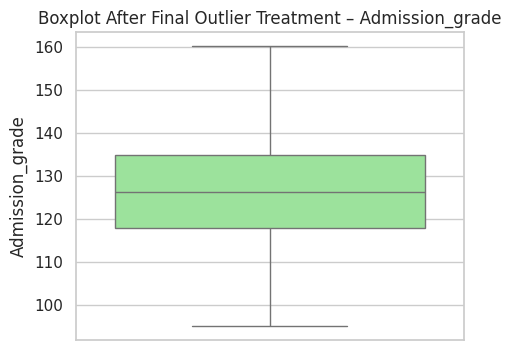

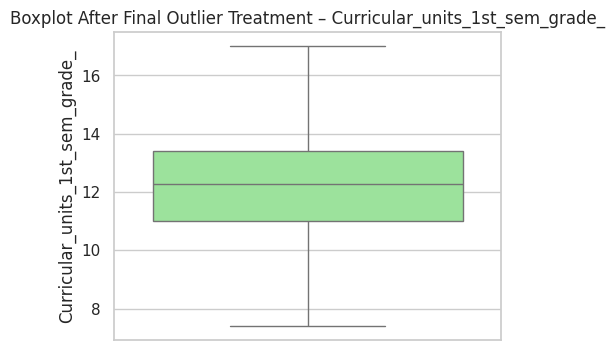

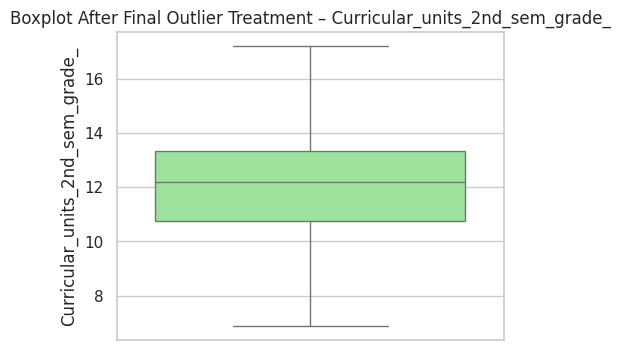

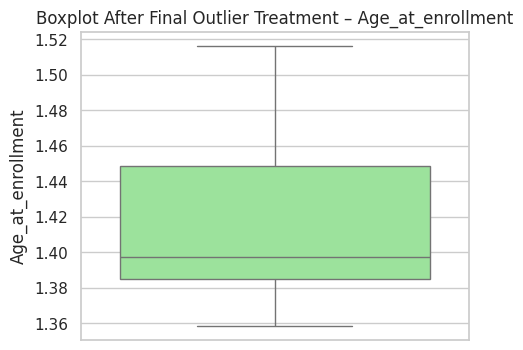

In [ ]:
# -------------------------------------------
# Visualize and Recheck Outliers
# -------------------------------------------
important_num = [
    'Admission_grade',
    'Curricular_units_1st_sem_grade_',
    'Curricular_units_2nd_sem_grade_',
    'Age_at_enrollment'
]

def cap_outliers(col):
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)

for col in important_num:
    cap_outliers(col)

print("\n✅ Outliers treated using IQR capping method.")

# Optional: Visualize after treatment
for col in important_num:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot After Final Outlier Treatment – {col}")
    plt.show()

4️⃣ FEATURE SCALING

In [ ]:
# -------------------------------------------
# Scaling (Standardization & Normalization)
# -------------------------------------------
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=[np.number]).columns
df_std = df.copy()
df_norm = df.copy()

df_std[num_cols] = scaler_std.fit_transform(df[num_cols])
df_norm[num_cols] = scaler_minmax.fit_transform(df[num_cols])

print("\n✅ Both Standardized and Normalized versions created.")


✅ Both Standardized and Normalized versions created.


5️⃣ FEATURE ENGINEERING

In [ ]:
# -------------------------------------------
# Combine Semester Grades to Overall Performance
# -------------------------------------------
df['Overall_Performance'] = df[['Curricular_units_1st_sem_grade_',
                                'Curricular_units_2nd_sem_grade_']].mean(axis=1)

In [ ]:
# -------------------------------------------
# Attendance Proxy (If available or derived)
# -------------------------------------------
# If "Tuition fees up to date" or "Scholarship holder" indicates regularity,
# create a pseudo-attendance score
df['Financial_Stability_Score'] = df['Tuition_fees_up_to_date'] + df['Scholarship_holder']

print("\n✅ Created derived features: Overall_Performance, Financial_Stability_Score")



✅ Created derived features: Overall_Performance, Financial_Stability_Score


In [ ]:
# Drop redundant columns if necessary
df.drop(['Curricular_units_1st_sem_grade_', 'Curricular_units_2nd_sem_grade_'], axis=1, inplace=True)
print("🧩 Dropped redundant semester grade columns after combining.")

🧩 Dropped redundant semester grade columns after combining.


6️⃣ FINAL DATASET SUMMARY

In [ ]:
print("\n📦 FINAL DATASET SUMMARY 📦")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nData Types:\n", df.dtypes.value_counts())

print("\n✅ Dataset is now cleaned, encoded, scaled & feature-engineered — ready for model training (Practical 5). 🚀")


📦 FINAL DATASET SUMMARY 📦
Shape: (4424, 34)

Columns:
 ['Marital_status', 'Daytime_evening_attendance_', 'Previous_qualification', 'Previous_qualification_grade_', 'Mother_s_qualification', 'Father_s_qualification', 'Mother_s_occupation', 'Father_s_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited_', 'Curricular_units_1st_sem_enrolled_', 'Curricular_units_1st_sem_evaluations_', 'Curricular_units_1st_sem_approved_', 'Curricular_units_1st_sem_without_evaluations_', 'Curricular_units_2nd_sem_credited_', 'Curricular_units_2nd_sem_enrolled_', 'Curricular_units_2nd_sem_evaluations_', 'Curricular_units_2nd_sem_approved_', 'Curricular_units_2nd_sem_without_evaluations_', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_Enrolled', 'Target_Graduate', 'Overall_Performance', 'Financial_Stability_Score']

Missing Values:
 0

Data